In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from Q1 import construct_splines, make_func

%matplotlib inline

In [3]:
fx_mapping = [(0,1),(1,1),(2,1),(3,-1),(4,-1),(5,-1)]

In [18]:
def construct_linear_splines(fx_mapping):
    
    """
    """
    n_splines = len(fx_mapping) - 1
    x = [item[0] for item in fx_mapping]
    y = [item[1] for item in fx_mapping]
    
    # create a structured array to store spline coefficients and section limits
    splines = np.zeros(n_splines, dtype=[("start", np.float64), ("end", np.float64), ("coefs",np.float64, 2)])
    
    for i in range(n_splines):
        
        xi = x[i]
        xi1 = x[i+1]
        yi = y[i]
        yi1 = y[i+1]
        
        c1 = (yi1-yi)/(xi1-xi)
        c2 = yi - c1*xi
        
        splines[i]["start"] = x[i]
        splines[i]["end"] = x[i+1]
        splines[i]["coefs"] = [c1,c2]
        
    return splines

In [49]:
def calculate_plot_cubic_spline(fx_mapping):
    
    """ calculate a cubic spline for the given points in fx_mapping.
        plot spline
    """
    splines = construct_splines(fx_mapping)
    lin_splines = construct_linear_splines(fx_mapping)
#     colors = ["darkblue", "darkorange", "darkgreen", "tomato", "darkmagenta"]
    colors = ["red","darkblue"]
    
    plt.figure(figsize=(16,9))
    
    n = len(splines)

    for i in range(n):
        
        spl = splines[i]
        lin_spl = lin_splines[i]
        
        start = spl["start"]
        end = spl["end"]
        spl_index = np.where(splines==spl)[0][0]

        x = np.arange(start,end,0.001) # set section dots for plotting
        f = make_func(spl["coefs"]) # make a function from spline coefficients
        f1 = make_func(lin_spl["coefs"])

        plt.plot(x, f1(x), c=colors[0])
        plt.plot(x, f(x), c=colors[1])

    lines = [Line2D([0], [0], color=c, linewidth=1.5, linestyle="-") for c in colors]
    labels = ["linear spline", "cubic spline"]
    plt.legend(lines, labels, prop={'size': 15})
    plt.show()

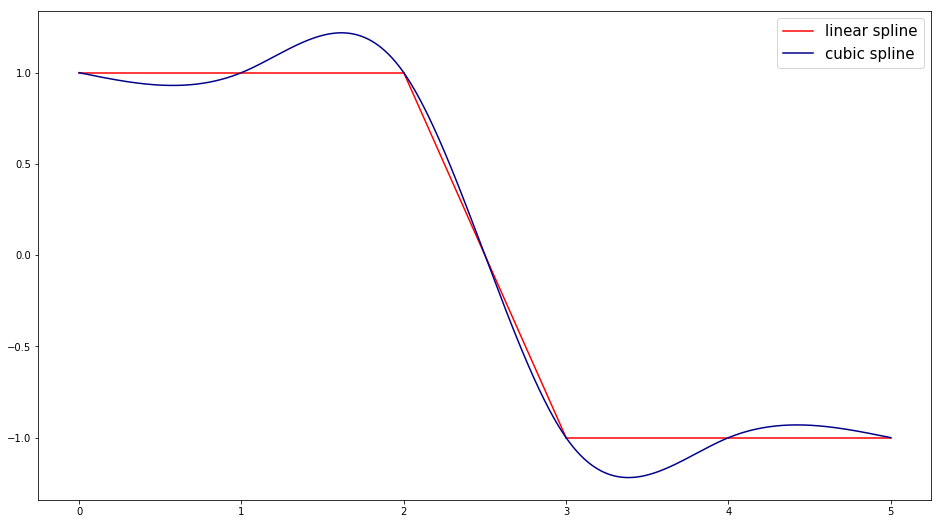

In [50]:
calculate_plot_cubic_spline(fx_mapping)